In [1]:
# import statements
import os
import pydub
import librosa
import tflearn
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms

from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


hdf5 not supported (please install/reinstall h5py)


In [2]:
andrew = 'audio_samples/andrew.wav'

In [3]:
# import with librosa
y, sr = librosa.load(andrew)

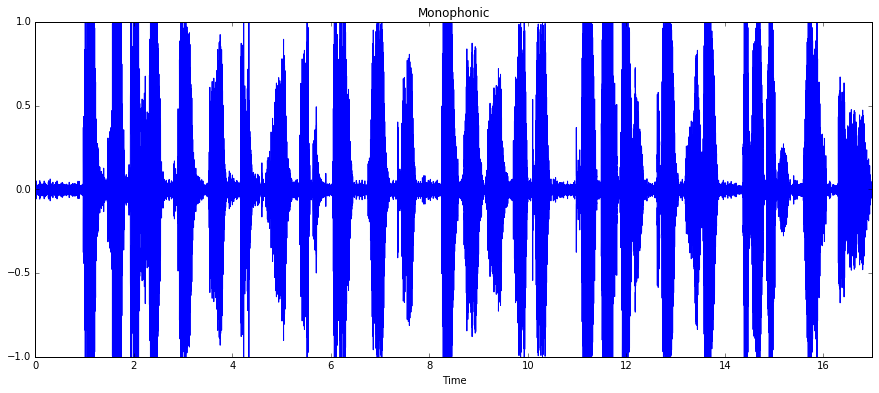

In [4]:
plt.figure(figsize= (15, 6))
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')
plt.show()

In [5]:
y_stft1 = librosa.stft(y=y, n_fft=1024)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


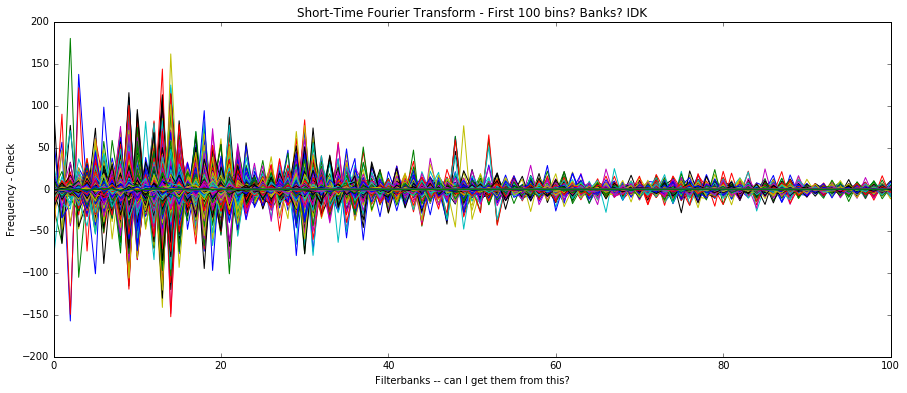

In [6]:
plt.figure(figsize= (15, 6))
plt.plot(y_stft1)
plt.xlim(0, 100)
plt.title('Short-Time Fourier Transform - First 100 bins? Banks? IDK')
plt.xlabel('Filterbanks -- can I get them from this?')
plt.ylabel('Frequency - Check')
plt.show()

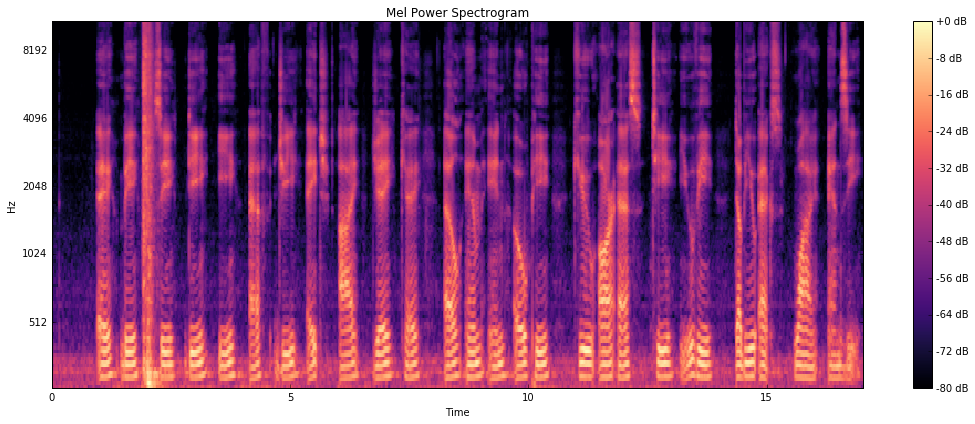

In [7]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(15, 6))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

plt.show()

In [25]:
fbank_feat = logfbank(y_stft1,sr)
t = np.linspace(0, len(fbank_feat)/sr, num=len(fbank_feat))

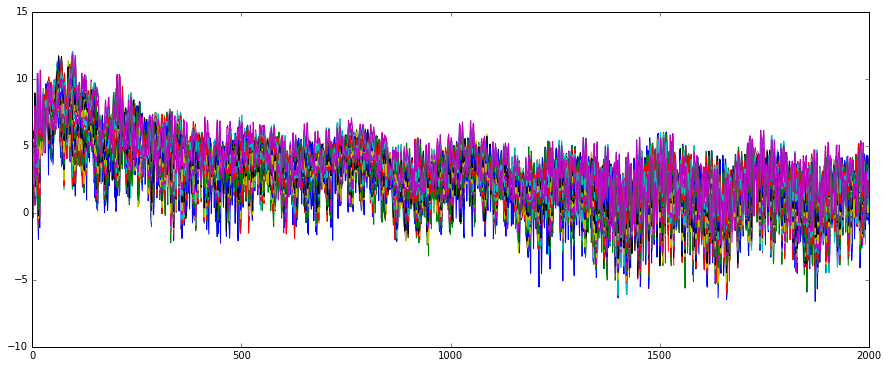

In [31]:
plt.figure(figsize= (15, 6))
plt.plot(fbank_feat)
plt.xlim(0, 2000)
plt.show()

In [32]:
melfb = librosa.filters.mel(22050, 2048)

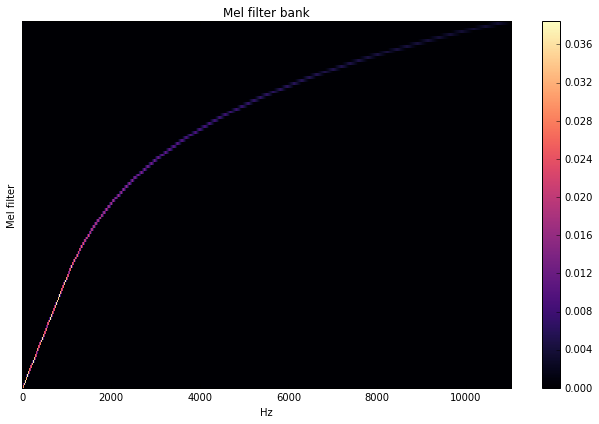

In [37]:
plt.figure(figsize= (9, 6))
plt.ylabel('Mel filter')
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

In [38]:
librosa.__version__ 

'0.5.0'

In [39]:
dir(librosa.core) 

['A_weighting',
 '_',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'amplitude_to_db',
 'audio',
 'autocorrelate',
 'clicks',
 'constantq',
 'cqt',
 'cqt_frequencies',
 'db_to_amplitude',
 'db_to_power',
 'dtw',
 'estimate_tuning',
 'fft_frequencies',
 'fill_off_diagonal',
 'fmt',
 'frames_to_samples',
 'frames_to_time',
 'get_duration',
 'harmonic',
 'hybrid_cqt',
 'hz_to_mel',
 'hz_to_midi',
 'hz_to_note',
 'hz_to_octs',
 'ifgram',
 'interp_harmonics',
 'istft',
 'load',
 'logamplitude',
 'magphase',
 'mel_frequencies',
 'mel_to_hz',
 'midi_to_hz',
 'midi_to_note',
 'note_to_hz',
 'note_to_midi',
 'octs_to_hz',
 'perceptual_weighting',
 'phase_vocoder',
 'piptrack',
 'pitch',
 'pitch_tuning',
 'power_to_db',
 'pseudo_cqt',
 'resample',
 'salience',
 'samples_to_frames',
 'samples_to_time',
 'spectrum',
 'stft',
 'tempo_frequencies',
 'time_frequency',
 'time_to_frames',
 'time_to_samples',
 'to_mono',
 'zero_crossings']

In [ ]:
librosa.core.amplitude_to_db

In [40]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [42]:
# doesnt work cuz of amplitude_to_db
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.core.amplitude_to_db(S_full[:, idx], ref=np.max),y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

ValueError: zero-size array to reduction operation maximum which has no identity

In [59]:
melfb = librosa.filters.mel(22050, 2048)

In [61]:
y_mel = melfb * y_stft1

ValueError: operands could not be broadcast together with shapes (128,1025) (513,1465) 

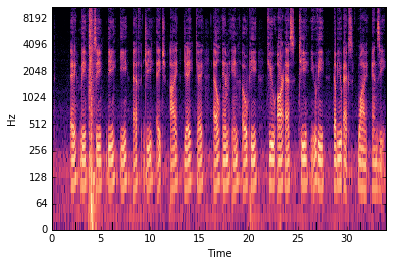

In [43]:
librosa.display.specshow(librosa.amplitude_to_db(y_stft1,ref=np.max),y_axis='log', x_axis='time')
plt.show()

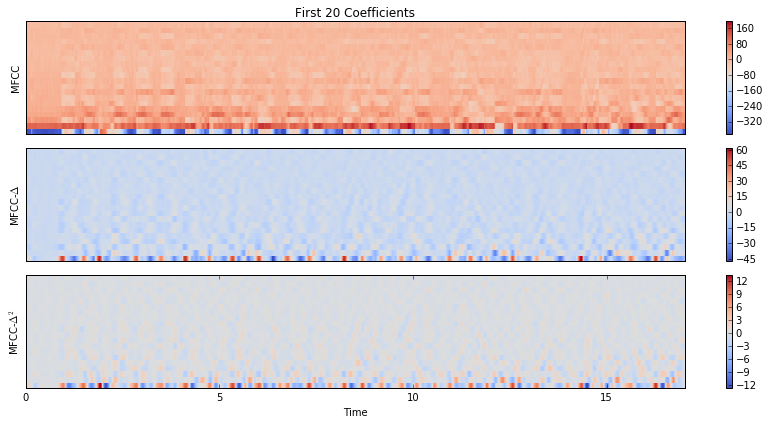

In [60]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))


plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.title('First 20 Coefficients')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()



plt.tight_layout()

plt.show()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

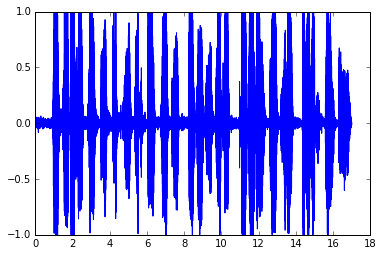

In [48]:
plt.plot(t, y)
plt.show()